# OASIS INFOBYTE INTERNSHIP

### TASK-4

### AUTHOR-SREEVIDYA A

## EMAIL SPAM DETECTION WITH MACHINE LEARNING

### Importing libraries and data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score,recall_score
import pickle

In [2]:
# Importing the dataset

df=pd.read_csv('spam.csv', encoding = ("ISO-8859-1"),low_memory = False)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# Checking the descriptive statistics

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Determining the row and column size

df.shape

(5572, 5)

In [6]:
# Seeing if there is any null values

df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#### Considering the row size, majority of the entries in Unnamed:2,Unnamed:3 and Unnamed:4 are null values.So its better to drop all the three columns

In [7]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Checking if there is any duplicated values

df.duplicated().sum()

403

In [10]:
# Removing the duplicated values keeping the first record

df.drop_duplicates(keep='first',inplace=True)

In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

In [14]:
# Renaming the columns

df.rename(columns={'v1':'type','v2':'text'},inplace = True)
df

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
# converting type into numerical form

df.loc[df['type']=='spam','type']=0
df.loc[df['type']=='ham','type']=1

In [16]:
df

,type,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [17]:
df['type']=df['type'].astype('int')

### Data Visualization

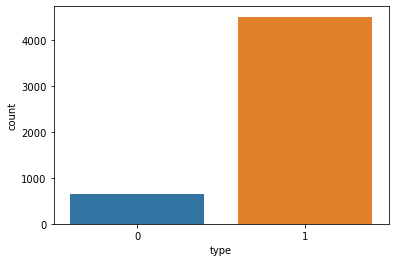

In [18]:
# Countplot of 'type'

sns.countplot(x=df['type'])
plt.show()

### Splitting dataset for training and testing

In [19]:
X=df['text']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [20]:
y=df['type']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: type, Length: 5169, dtype: int32

In [21]:
# Splitting the dataset into X_train, X_test, y_train and y_test using train_test_split function

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)

In [22]:
X_train  # train dataset (independent variable)

5058    Free video camera phones with Half Price line ...
2604    You call times job today ok umma and ask them ...
2113    Yeah, don't go to bed, I'll be back before mid...
4948                    I am in bus on the way to calicut
1934                     Hope you are having a great day.
                              ...                        
4608                               Y de asking like this.
2667                   Why de. You looking good only:-)..
546     I know but you need to get hotel now. I just g...
1257          Am also doing in cbe only. But have to pay.
4568                  At WHAT TIME should i come tomorrow
Name: text, Length: 3618, dtype: object

In [23]:
y_train # train dataset (dependent variable)

5058    0
2604    1
2113    1
4948    1
1934    1
       ..
4608    1
2667    1
546     1
1257    1
4568    1
Name: type, Length: 3618, dtype: int32

In [24]:
X_test # test dataset (independent variable)

993     The Xmas story is peace.. The Xmas msg is love...
4599    Hi did u decide wot 2 get 4 his bday if not il...
1843                Super da:)good replacement for murali
3491    I will reach office around  &lt;DECIMAL&gt; . ...
3927       Babe ? I lost you ... Will you try rebooting ?
                              ...                        
1660           No just send to you. Bec you in temple na.
1101    Yeah go on then, bored and depressed sittin wa...
1160             You sure your neighbors didnt pick it up
4993           My drive can only be read. I need to write
1416              No..few hours before.went to hair cut .
Name: text, Length: 1551, dtype: object

In [25]:
y_test # test dataset(dependent variable)

993     1
4599    1
1843    1
3491    1
3927    1
       ..
1660    1
1101    1
1160    1
4993    1
1416    1
Name: type, Length: 1551, dtype: int32

### Building Model

In [26]:
vector=TfidfVectorizer()
vector.fit(X_train)

TfidfVectorizer()

In [27]:
X_transformed=vector.transform(X_train.values)
X_transformed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
X_test_transformed=vector.transform(X_test)

#### Here we are using Support Vector Machine to build our model

In [29]:
svmmodel=svm.SVC()
svmmodel.fit(X_transformed,y_train)

SVC()

In [30]:
svm_pred=svmmodel.predict(X_test_transformed)

In [31]:
print('Classification Report\n')
print(classification_report(svm_pred,y_test))

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       174
           1       1.00      0.97      0.99      1377

    accuracy                           0.98      1551
   macro avg       0.91      0.98      0.94      1551
weighted avg       0.98      0.98      0.98      1551



In [32]:
print('Accuracy=',accuracy_score(svm_pred,y_test))

Accuracy= 0.9754996776273372


In [33]:
print('F1 score=',f1_score(svm_pred,y_test))

F1 score= 0.9860191317144961


In [34]:
print('Recall score=',recall_score(svm_pred,y_test))

Recall score= 0.9731299927378358


In [35]:
print('Confusion Matrix')
confusion_matrix(svm_pred,y_test)

Confusion Matrix


array([[ 173,    1],
       [  37, 1340]], dtype=int64)

#### The model we built have high accuracy, F1 score and Recall. 